# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [5]:
data[data['total_income'].isna()]['income_type'].value_counts()

сотрудник          1105
компаньон           508
пенсионер           413
госслужащий         147
предприниматель       1
Name: income_type, dtype: int64

In [6]:
data[data['total_income'].isna()]['education'].value_counts(normalize=True)

среднее                0.647654
высшее                 0.228151
СРЕДНЕЕ                0.030819
Среднее                0.029899
неоконченное высшее    0.025299
Высшее                 0.011500
ВЫСШЕЕ                 0.010580
начальное              0.008740
Неоконченное высшее    0.003220
НЕОКОНЧЕННОЕ ВЫСШЕЕ    0.003220
Начальное              0.000460
НАЧАЛЬНОЕ              0.000460
Name: education, dtype: float64

In [7]:
len(data.loc[(data['days_employed'].isna()) & (data['total_income'].isna())])

2174

In [8]:
data['education'].value_counts(normalize=True)

среднее                0.638792
высшее                 0.219187
СРЕДНЕЕ                0.035865
Среднее                0.033031
неоконченное высшее    0.031034
ВЫСШЕЕ                 0.012729
Высшее                 0.012451
начальное              0.011614
Неоконченное высшее    0.002184
НЕОКОНЧЕННОЕ ВЫСШЕЕ    0.001347
НАЧАЛЬНОЕ              0.000790
Начальное              0.000697
ученая степень         0.000186
Ученая степень         0.000046
УЧЕНАЯ СТЕПЕНЬ         0.000046
Name: education, dtype: float64

In [9]:
data.groupby(data['total_income'].isna()).mean()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
total_income,,,,,,,
False,0.537388,63046.497661,43.255336,0.819079,0.972249,0.081184,167422.302208
True,0.552438,NaN,43.632015,0.800828,0.975161,0.078197,NaN


**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [10]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [11]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [12]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [13]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [14]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [15]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [16]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [17]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [18]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [19]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [20]:
data.duplicated().sum()

71

In [21]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [22]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [23]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [24]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [25]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [26]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [27]:
data_pivot=data.pivot_table(index='children',values='debt',aggfunc = {'count','sum','mean'} )

In [28]:
def made_pivot(df,index):
    data_pivot=df.pivot_table(index=index,values='debt',aggfunc = {'count','sum','mean'} )
    data_pivot=data_pivot.rename(columns={'count':'Количество кредитов','sum':'Число клиентов с просрочной по кредиту','mean':'Доля должников'})
    data_pivot['Доля категории от числа всех клиентов']=data_pivot['Количество кредитов']/data.shape[0]
    return data_pivot

In [29]:
data_pivot=data_pivot.rename(columns={'count':'Количество кредитов','sum':'Число клиентов с просрочной по кредиту','mean':'Доля должников'})
data_pivot

,Количество кредитов,Доля должников,Число клиентов с просрочной по кредиту
children,,,
0,14091.0,0.075438,1063.0
1,4808.0,0.092346,444.0
2,2052.0,0.094542,194.0
3,330.0,0.081818,27.0
4,41.0,0.097561,4.0
5,9.0,0.000000,0.0


In [30]:
data_pivot['Доля категории от числа всех клиентов']=data_pivot['Количество кредитов']/data.shape[0]

In [31]:
display(data_pivot)

,Количество кредитов,Доля должников,Число клиентов с просрочной по кредиту,Доля категории от числа всех клиентов
children,,,,
0,14091.0,0.075438,1063.0,0.660588
1,4808.0,0.092346,444.0,0.225400
2,2052.0,0.094542,194.0,0.096198
3,330.0,0.081818,27.0,0.015470
4,41.0,0.097561,4.0,0.001922
5,9.0,0.000000,0.0,0.000422


In [32]:
kids =(data[['children','debt']]).groupby('children').agg({'debt': ['count', 'sum']})
kids['ratio'] = kids['debt']['sum'] / kids['debt']['count']
kids_1=kids.drop(['debt'], axis=1)
kids_1

,ratio
,
children,
0,0.075438
1,0.092346
2,0.094542
3,0.081818
4,0.097561
5,0.000000


In [33]:
data['children'].value_counts(normalize=True)

0    0.660588
1    0.225400
2    0.096198
3    0.015470
4    0.001922
5    0.000422
Name: children, dtype: float64

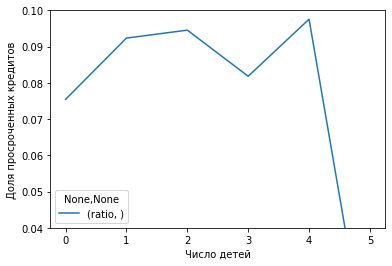

In [34]:
kids_1.plot(xlabel= 'Число детей', ylabel= 'Доля просроченных кредитов')
plt.ylim([0.04, 0.1])
plt.show()

In [35]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.

**Вывод:** 
Как мы видим существует прямая зависимость между количеством детей и долей просроченной задолженности.С появлением детей уровень  просроченной задолженности растет.Так доля просроченной задолженности растет на 22% ((0,092/0,074-1)*100) при наличии 1 ребенка по сравнению с отсутствием детей. Эту тенденцию подтверждает рост доли просроченной задолженнности в семьях с 2 детьми.
Данных по семьям с 3 и более детей недостаточно, чтобы подтвердить какие либо зависимости так как  как видно из сводной таблицы их доля вместе меньше 2 процентов от числа всех клиентов. Таким образом явно выражена зависимость в увеличении просроченной задолженности с увеличением количества детей. 

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [36]:
family = data[['family_status','debt']]
family_grouped = family.groupby('family_status')['debt'].sum()/family.groupby('family_status')['debt'].count()
family_grouped=family_grouped.sort_values()
family_grouped
# Ваш код будет здесь. Вы можете создавать новые ячейки.

family_status
вдовец / вдова           0.066246
в разводе                0.070648
женат / замужем          0.075606
гражданский брак         0.093130
Не женат / не замужем    0.097639
Name: debt, dtype: float64

In [37]:
family['family_status'].value_counts(normalize=True)

женат / замужем          0.574797
гражданский брак         0.193802
Не женат / не замужем    0.131077
в разводе                0.055740
вдовец / вдова           0.044583
Name: family_status, dtype: float64

In [38]:
family_pivot = made_pivot(data,'family_status')

In [39]:
display(family_pivot)

,Количество кредитов,Доля должников,Число клиентов с просрочной по кредиту,Доля категории от числа всех клиентов
family_status,,,,
Не женат / не замужем,2796.0,0.097639,273.0,0.131077
в разводе,1189.0,0.070648,84.0,0.055740
вдовец / вдова,951.0,0.066246,63.0,0.044583
гражданский брак,4134.0,0.093130,385.0,0.193802
женат / замужем,12261.0,0.075606,927.0,0.574797


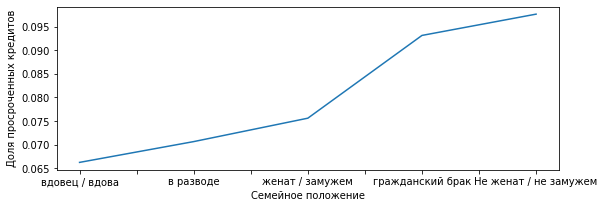

In [40]:
family_grouped.plot(figsize=(9,3),xlabel= 'Семейное положение', ylabel= 'Доля просроченных кредитов')

plt.show()

**Вывод:** 
Существует явная зависимость между  семейным положением и долей просроченной задолженности.Так клиенты банка которые не находятся в браке имеют значительно более высокий уровень задолженности, по сравнению с другими категориями. Клиенты банка в гражданском браке имеют более высокий уровень задолженности чем клиенты в браке. Неожиданно клиенты в разводе имеют более низкий уровень задолженности, чем клиенты находящиеся в браке .И самый низкий уровень задолженности имеют клиенты которые потеряли супругу/супруга. Исходя из текущих результатов можно предположить что имеется не только связь между браком и уровнем задолженности, а также связь между возрастом клиента и снижением доли просроченной задолженности. Причиной этого может быть более высокая ответственность и жизненный опыт таких людей.
Сама выборка вдовцов /вдовы составляет 4,4% от всех категорий что может влиять на точность исследования.В данном случае имеет смысл разделить данные на две категории живущих в браке и нет, чтобы выборки были одинаковые по размеру.

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [41]:
income = data[['total_income_category','debt']]
income_grouped = income.groupby('total_income_category')['debt'].sum()/income.groupby('total_income_category')['debt'].count()
income_grouped
# Ваш код будет здесь. Вы можете создавать новые ячейки.

total_income_category
A    0.080000
B    0.070602
C    0.084982
D    0.060172
E    0.090909
Name: debt, dtype: float64

In [42]:
income_pivot=made_pivot(data,'total_income_category')

In [43]:
display(income_pivot)

,Количество кредитов,Доля должников,Число клиентов с просрочной по кредиту,Доля категории от числа всех клиентов
total_income_category,,,,
A,25.0,0.080000,2.0,0.001172
B,5014.0,0.070602,354.0,0.235057
C,15921.0,0.084982,1353.0,0.746379
D,349.0,0.060172,21.0,0.016361
E,22.0,0.090909,2.0,0.001031


In [44]:
data['total_income_category'].value_counts(normalize=True)

C    0.746379
B    0.235057
D    0.016361
A    0.001172
E    0.001031
Name: total_income_category, dtype: float64

<AxesSubplot:xlabel='Категория дохода', ylabel='Доля просроченных кредитов'>

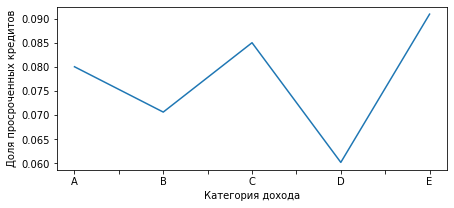

In [45]:
income_grouped.plot(figsize=(7,3),xlabel= 'Категория дохода', ylabel= 'Доля просроченных кредитов')

**Вывод:** 
После изучения данных можно сделать вывод , что достаточно данных только для категорий B  и С , чтобы сделать обоснованные выводы. По данным этих категорий выявлено , что существует существенная зависимость между категорией дохода и уровнем просроченной задолженности. Так клиенты с более высоким доходом ( категория B) демонстрируют более низкий уровень просрочки по сравнению с категорией С.Причиной этого может быть то, что обладая более высоким доходом проще выплатить кредит. 

<div class="alert alert-info">
<b>Комментарий студента №5 Исправил выводы</b>

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [46]:
data.columns
data.head(20)
# Ваш код будет здесь. Вы можете создавать новые ячейки.

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы
5,0,926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья,B,операции с недвижимостью
6,0,2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,операции с жильем,B,операции с недвижимостью
7,0,152.779569,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823,образование,C,получение образования
8,2,6929.865299,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856,на проведение свадьбы,C,проведение свадьбы
9,0,2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425,покупка жилья для семьи,C,операции с недвижимостью


In [47]:
target=data[['purpose_category','debt']]
target_grouped = target.groupby('purpose_category')['debt'].sum()/target.groupby('purpose_category')['debt'].count()
target_grouped

purpose_category
операции с автомобилем      0.093480
операции с недвижимостью    0.072551
получение образования       0.092528
проведение свадьбы          0.079118
Name: debt, dtype: float64

In [48]:
target_pivot=made_pivot(data,'purpose_category')

In [49]:
display(target_pivot)

,Количество кредитов,Доля должников,Число клиентов с просрочной по кредиту,Доля категории от числа всех клиентов
purpose_category,,,,
операции с автомобилем,4279.0,0.093480,400.0,0.200600
операции с недвижимостью,10751.0,0.072551,780.0,0.504008
получение образования,3988.0,0.092528,369.0,0.186958
проведение свадьбы,2313.0,0.079118,183.0,0.108434


In [50]:
data['purpose_category'].value_counts(normalize=True)

операции с недвижимостью    0.504008
операции с автомобилем      0.200600
получение образования       0.186958
проведение свадьбы          0.108434
Name: purpose_category, dtype: float64

<AxesSubplot:xlabel='purpose', ylabel='Доля просроченных кредитов'>

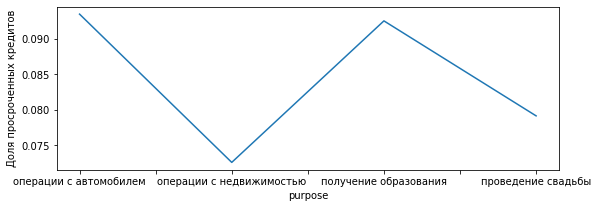

In [51]:
target_grouped.plot(figsize=(9,3),xlabel= 'purpose', ylabel= 'Доля просроченных кредитов')

**Вывод:** Существует зависимость возврата кредита в срок с категорией цели кредита. Самые безопасные для банка категории это операции с недвижимостью и проведение свадьбы. Категории представлены неравномерно но в целом имеют достаточную выборку.

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* 
Проанализировав пропуски можно сделать вывод что, корреляция пропусков в столбцах total_income и days_employed сто процентов. То есть пропуски данных встречаются одновременно в этих двух столбцах. Также можно сделать вывод что эти пропуски  не связаны с другими столбцами.Причиной пропусков может быть человеческий фактор так клиенты могли совершить пропуски в заполнении данных , или не хотели  давать данную информацию.Кроме того, возможно ошибка была на этапе выгрузки данных - например ошибка при обьединении таблиц. 

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:*  Медианное значение лучше всего отражает выборку в целом, в случае, если есть незаполненные данные. Среднее арифметическое отражает ситуацию некорректно, так как выбросы в данных могут значительно искажать среднее арифметическое , и при заполнении пропусков этим значением данные искажаются


### Шаг 4: общий вывод.

В ходе проведенного исследования были обнаружены пропуски в столбцах days_employed и total_income.  Пропуски в total_income были заполнены медианным значением по каждому типу из столбца income_type. Также были обнаружены и исправлены аномалии в столбце days_, employed- например, отрицательные значения. Также были исправлены аномальные значения в столбце children Причиной этих аномалий скорее всего был человеческий фактор, а именно ошибки или при заполнении, или при вычислении значений с помощью формул. Также в ходе исследования были найдены и исправлены явные и неявные дубликаты. После этого была проведена категоризация столбцов total_income_category и purpose_category. Наконец были построены сводные таблицы для каждой зависимости. После чего были выявлено что с увеличением числа детей у заемщиков растет вероятность просрочки по кредиту. Также выявлено, что наличия брака в настоящем или прошлом клиентов повышает вероятность что кредит будет отдан в срок. Кроме того, выявлено что с увеличением дохода вероятность отдачи кредита в срок также увеличивается. И наконец выявлено, что наибольшая вероятность отдачи кредита в срок у кредита на недвижимость, а самая низкая вероятность отдачи кредита у кредитов на автомобиль и кредитов на образование.
 Таким образом банку необходимо относится с осторожностью к клиентам, не вступавшим в брак, имеющим низкий доход и также берущим кредит на получение образования или на автомобиль. Предпочтения для выдачи кредита — это клиенты берущие ипотечный кредит, обладающие средним или высоким доходом, а также не имеющие детей 
